# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome()

url = "https://etherscan.io/txs"

driver.get(url)

In [3]:
def extract_html_content(driver):
    body = driver.find_element(By.TAG_NAME,"tbody")
    html_content=body.get_attribute("innerHTML")
    soup = BeautifulSoup(html_content, "html.parser")
    return soup.find_all("tr")

In [4]:
def extract_attributes(item):
    return {
            "txn Hash": item.find("span", class_="hash-tag").text.strip(),
            "Method": item.find("span", class_="badge").text.strip(),
            "Block": item.find_all("td")[3].text.strip(),
            "Age": item.find("td", class_="showAge").text.strip(),
            "Sender": item.find_all("td")[7].text.strip(),
            "Receiver": item.find_all("td")[9].text.strip(),
            "Value": item.find_all("td")[10].text.strip(),
            "Txn Fee": item.find_all("td", class_="small text-muted showTxnFee")[0].text.strip()
    }

In [5]:
all_data = []
page_number=0
while(page_number<50):
    tr=extract_html_content(driver)
    for item in tr:    
        all_data.append(extract_attributes(item))
    next_page = driver.find_element(By.XPATH, '//a[@class="page-link px-3" and @aria-label="Next"]')  # Locate the next page link
    next_page.click()
    page_number+=1

df = pd.DataFrame(all_data)
driver.close()


In [6]:
first_10_blocks = df["Block"].drop_duplicates().head(10)
filtered_df = df[df["Block"].isin(first_10_blocks)].drop_duplicates(subset="txn Hash", keep="first")
filtered_df

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
0,0x8683e19059dded0e7fba5c01c7f7d267854c1d30a92f...,Transfer,19398343,7 secs ago,0x1AB4973a...7688f8F23,0xbf7769d6...6044a582B,0.007732571 ETH,0.00154219
1,0x9125c9684252b440fbd762726296109e5b08d98e3c33...,Transfer,19398343,7 secs ago,0xe401A6A3...cCaCA45E8,Injective Protocol: INJ Token,0 ETH,0.00219959
2,0x15851f0db05ebd87e6ab8838204c0a4445fb28692150...,Transfer,19398343,7 secs ago,0xe401A6A3...cCaCA45E8,Render : RNDR Token,0 ETH,0.00274969
3,0x483a6ba8f0e708d14e620992a68432ba785ebb2cb721...,Transfer,19398343,7 secs ago,Crypto.com 2,0x7bace6C6...E314e7A15,0.9239 ETH,0.0015134
4,0xa74a3fa3afb96963233b26a98262312ffaea439eee71...,Transfer,19398343,7 secs ago,Crypto.com 2,0x4421cFF5...247c6E390,0.04537 ETH,0.0015134
...,...,...,...,...,...,...,...,...
2495,0xf15d7b5531b4e9ed0043b22200a76924446ba6d0c415...,Transfer,19398340,2 mins ago,0x99695653...ebEe51738,Coinbase 13,0.006752513 ETH,0.00124394
2496,0x9e5579f6059ac590c7a2bb173120c146a94127ce9819...,Transfer,19398340,2 mins ago,0x2e9Db1A1...81F9A4171,0x1ec09AB5...b90E74b99,0.01 ETH,0.00124394
2497,0xe1b7659093494731dea46b0286ee6db48c2c69851859...,Transfer,19398340,2 mins ago,0x64e4e046...122EC8f0d,Coinbase 13,0.008691499 ETH,0.00124394
2498,0x20f003d3319c6de5765a091d974aa0ee5e6c5ea3ee3c...,Transfer,19398340,2 mins ago,Coinbase 11,0x47A46D4B...e710a71E2,0.01276446 ETH,0.00124394


In [7]:
backup_df = filtered_df.copy(deep=True)
filtered_df.dtypes

txn Hash    object
Method      object
Block       object
Age         object
Sender      object
Receiver    object
Value       object
Txn Fee     object
dtype: object

In [44]:
filtered_df = backup_df.copy(deep=True)

In [45]:
def print_unique_elements(df, column_name):
    try:
        unique_counts = df[column_name].value_counts()
        i = 0 
        for value, count in unique_counts.items():
            i = i + 1 
            print(f"{i} : {value} Count: {count}")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [46]:
print_unique_elements(filtered_df, "Method")

1 : Transfer Count: 708
2 : Execute Count: 154
3 : Approve Count: 124
4 : Flush Forwarder ... Count: 66
5 : Create Forwarder Count: 51
6 : Swap Count: 32
7 : Transfer From Count: 31
8 : Send Multi Sig Count: 20
9 : Withdraw Count: 17
10 : Set Approval For... Count: 14
11 : Deposit Count: 13
12 : Swap Exact Token... Count: 13
13 : 0x00000000 Count: 11
14 : Sell To Uniswap Count: 11
15 : Unoswap Count: 10
16 : Swap Exact ETH F... Count: 10
17 : Transfer* Count: 9
18 : Take Ask Single Count: 8
19 : 0x9871efa4 Count: 8
20 : Multicall Count: 7
21 : Sell Eth For Tok... Count: 6
22 : 0x75713a08 Count: 6
23 : Swap Tokens For ... Count: 4
24 : 0x0938b20b Count: 4
25 : 0x415565b0 Count: 4
26 : Unstake Count: 3
27 : Claim Rewards Count: 3
28 : Submit Data Count: 3
29 : Mooo Z1089603480 Count: 3
30 : Mint With Owner ... Count: 3
31 : Take Ask Count: 3
32 : Mint Count: 3
33 : 0xce2e62ff Count: 3
34 : Borrow Count: 2
35 : Sell Token For E... Count: 2
36 : Send ERC20 Count: 2
37 : Sigma Buy Count: 2


In [47]:
print_unique_elements(filtered_df,"Age")

1 : 2 mins ago Count: 569
2 : 1 min ago Count: 443
3 : 7 secs ago Count: 50
4 : 16 secs ago Count: 50
5 : 26 secs ago Count: 50
6 : 42 secs ago Count: 50
7 : 56 secs ago Count: 50
8 : 57 secs ago Count: 50
9 : 55 secs ago Count: 37
10 : 12 secs ago Count: 33
11 : 27 secs ago Count: 33
12 : 14 secs ago Count: 26
13 : 2 secs ago Count: 24
14 : 24 secs ago Count: 17
15 : 41 secs ago Count: 17
16 : 43 secs ago Count: 13


In [48]:
print_unique_elements(filtered_df,"Block")

1 : 19398344 Count: 246
2 : 19398342 Count: 243
3 : 19398341 Count: 168
4 : 19398340 Count: 158
5 : 19398346 Count: 156
6 : 19398343 Count: 153
7 : 19398345 Count: 125
8 : 19398348 Count: 124
9 : 19398347 Count: 106
10 : 19398349 Count: 33


In [61]:
print_unique_elements(filtered_df,"Txn Fee")

1 : 0.00133219 Count: 19
2 : 0.00122518 Count: 15
3 : 0.00133235 Count: 14
4 : 0.00124394 Count: 13
5 : 0.0014178 Count: 12
6 : 0.0016051 Count: 12
7 : 0.0015841 Count: 12
8 : 0.00154048 Count: 12
9 : 0.00148746 Count: 11
10 : 0.001701 Count: 11
11 : 0.00167491 Count: 11
12 : 0.0015722 Count: 10
13 : 0.00144733 Count: 10
14 : 0.00137804 Count: 9
15 : 0.00149656 Count: 7
16 : 0.0013968 Count: 7
17 : 0.00156312 Count: 6
18 : 0.00133435 Count: 6
19 : 0.00156521 Count: 5
20 : 0.00184293 Count: 5
21 : 0.00145674 Count: 5
22 : 0.00153207 Count: 4
23 : 0.0015883 Count: 4
24 : 0.0015134 Count: 4
25 : 0.00145459 Count: 4
26 : 0.00153022 Count: 4
27 : 0.00163509 Count: 4
28 : 0.00137417 Count: 4
29 : 0.00156152 Count: 4
30 : 0.00165391 Count: 3
31 : 0.00135317 Count: 3
32 : 0.00163293 Count: 3
33 : 0.0015946 Count: 3
34 : 0.00150066 Count: 3
35 : 0.00153237 Count: 2
36 : 0.00157472 Count: 2
37 : 0.00164128 Count: 2
38 : 0.00217141 Count: 2
39 : 0.0015512 Count: 2
40 : 0.001533 Count: 2
41 : 0.00

In [50]:
print_unique_elements(filtered_df,"Value")

1 : 0 ETH Count: 865
2 : 0.01 ETH Count: 18
3 : 0.1 ETH Count: 15
4 : 0.5 ETH Count: 12
5 : 1 ETH Count: 10
6 : 0.05 ETH Count: 8
7 : 0.2 ETH Count: 8
8 : 0.02 ETH Count: 6
9 : 0.06 ETH Count: 5
10 : 0.3 ETH Count: 5
11 : 0.25 ETH Count: 5
12 : 0.4 ETH Count: 5
13 : 1.5 ETH Count: 5
14 : 2 ETH Count: 4
15 : 0.04 ETH Count: 4
16 : 0.15 ETH Count: 4
17 : 0.35 ETH Count: 4
18 : 0.13 ETH Count: 4
19 : 0.031 ETH Count: 3
20 : 0.0225 ETH Count: 3
21 : 0.12 ETH Count: 3
22 : 32 ETH Count: 3
23 : 0.255211091 ETH Count: 3
24 : 0.072 ETH Count: 3
25 : 5 ETH Count: 3
26 : 0.03 ETH Count: 3
27 : 0.0365 ETH Count: 2
28 : 0.125 ETH Count: 2
29 : 0.0709 ETH Count: 2
30 : 0.325 ETH Count: 2
31 : 0.75 ETH Count: 2
32 : 0.08 ETH Count: 2
33 : 0.55 ETH Count: 2
34 : 0.9 ETH Count: 2
35 : 0.02375 ETH Count: 2
36 : 0.0219745 ETH Count: 2
37 : 0.39 ETH Count: 2
38 : 0.27 ETH Count: 2
39 : 1.3 ETH Count: 2
40 : 3 ETH Count: 2
41 : 0.6 ETH Count: 2
42 : 0.66 ETH Count: 2
43 : 0.008 ETH Count: 2
44 : 0.22 ETH 

In [51]:
def convert_to_eth(value):
    try:
        if "wei" in value:
            # Convert wei to ETH
            wei_value = float(value.replace(" wei", ""))
            eth_value = wei_value / 1e18  # Divide by 10^18
        else:
            # Assume it's already in ETH format
            eth_value = float(value.replace(" ETH", ""))
        return eth_value
    except ValueError:
        # Handle any conversion errors (e.g., invalid input)
        return np.nan

filtered_df['Value'] = filtered_df['Value'].apply(convert_to_eth)
filtered_df = filtered_df[filtered_df['Value'] != 0]
print_unique_elements(filtered_df,"Value")

1 : 0.01 Count: 18
2 : 0.1 Count: 15
3 : 0.5 Count: 12
4 : 1.0 Count: 10
5 : 0.05 Count: 8
6 : 0.2 Count: 8
7 : 0.02 Count: 6
8 : 0.25 Count: 5
9 : 1.5 Count: 5
10 : 0.3 Count: 5
11 : 0.4 Count: 5
12 : 0.06 Count: 5
13 : 0.15 Count: 4
14 : 0.04 Count: 4
15 : 2.0 Count: 4
16 : 0.35 Count: 4
17 : 0.13 Count: 4
18 : 0.255211091 Count: 3
19 : 5.0 Count: 3
20 : 0.12 Count: 3
21 : 0.0225 Count: 3
22 : 32.0 Count: 3
23 : 0.031 Count: 3
24 : 0.072 Count: 3
25 : 0.03 Count: 3
26 : 0.08 Count: 2
27 : 0.55 Count: 2
28 : 0.27 Count: 2
29 : 0.75 Count: 2
30 : 0.02375 Count: 2
31 : 0.0365 Count: 2
32 : 1.3 Count: 2
33 : 0.125 Count: 2
34 : 3.0 Count: 2
35 : 0.66 Count: 2
36 : 0.0709 Count: 2
37 : 0.6 Count: 2
38 : 0.39 Count: 2
39 : 0.325 Count: 2
40 : 0.9 Count: 2
41 : 2.4e-08 Count: 2
42 : 0.22 Count: 2
43 : 0.008 Count: 2
44 : 0.0219745 Count: 2
45 : 0.073 Count: 2
46 : 0.083492383 Count: 1
47 : 0.013 Count: 1
48 : 0.017269 Count: 1
49 : 1.020844365 Count: 1
50 : 0.000510422 Count: 1
51 : 0.01467

In [52]:
filtered_df

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
0,0x8683e19059dded0e7fba5c01c7f7d267854c1d30a92f...,Transfer,19398343,7 secs ago,0x1AB4973a...7688f8F23,0xbf7769d6...6044a582B,0.007733,0.00154219
3,0x483a6ba8f0e708d14e620992a68432ba785ebb2cb721...,Transfer,19398343,7 secs ago,Crypto.com 2,0x7bace6C6...E314e7A15,0.923900,0.0015134
4,0xa74a3fa3afb96963233b26a98262312ffaea439eee71...,Transfer,19398343,7 secs ago,Crypto.com 2,0x4421cFF5...247c6E390,0.045370,0.0015134
6,0x4abe4ba1d3ba231eac0889177fc8c76739f919da1e63...,Transfer,19398343,7 secs ago,Crypto.com 2,0x5e703FB2...1aF079779,0.012130,0.0015134
8,0x1636d1d0bc6d5e16aa0dddc319f3f2717ddd14d3c7d4...,Transfer,19398343,7 secs ago,Binance 14,0xc33b2249...3AFbbeb4d,0.021975,0.00154048
...,...,...,...,...,...,...,...,...
2495,0xf15d7b5531b4e9ed0043b22200a76924446ba6d0c415...,Transfer,19398340,2 mins ago,0x99695653...ebEe51738,Coinbase 13,0.006753,0.00124394
2496,0x9e5579f6059ac590c7a2bb173120c146a94127ce9819...,Transfer,19398340,2 mins ago,0x2e9Db1A1...81F9A4171,0x1ec09AB5...b90E74b99,0.010000,0.00124394
2497,0xe1b7659093494731dea46b0286ee6db48c2c69851859...,Transfer,19398340,2 mins ago,0x64e4e046...122EC8f0d,Coinbase 13,0.008691,0.00124394
2498,0x20f003d3319c6de5765a091d974aa0ee5e6c5ea3ee3c...,Transfer,19398340,2 mins ago,Coinbase 11,0x47A46D4B...e710a71E2,0.012764,0.00124394


In [53]:
def calculate_mean_and_std(df, column_name):
    try:
        column_mean = df[column_name].mean()
        column_std = df[column_name].std()
        return column_mean, column_std
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return np.nan, np.nan

In [54]:
filtered_df["Txn Fee"] = filtered_df["Txn Fee"].astype(float)

In [55]:
mean_value, std_value = calculate_mean_and_std(filtered_df, "Value")
mean_fee, std_fee = calculate_mean_and_std(filtered_df, "Txn Fee")

In [56]:
print(f"Value mean = {mean_value} \nValue std = {std_value} \nfee mean = {mean_fee} \nfee std = {std_fee}")

Value mean = 1.4483545958699693 
Value std = 9.967998421271421 
fee mean = 0.006194392225656878 
fee std = 0.020676930764344625


In [62]:
from scipy.stats import norm

def plot_histogram_and_kde(df, column_name , bins_count):
    try:
        sns.set(style="whitegrid")

        # Plot histogram with wider bars (adjust binwidth as needed)
        sns.histplot(df[column_name], bins=bins_count, color='skyblue', edgecolor='black')

        # Calculate mean and standard deviation
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        # Generate values for the normal distribution
        x_values = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        # Overlay Gaussian distribution (KDE)
        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        max_count = df[column_name].value_counts().max()

        # Set y-axis limit to the maximum count
        plt.ylim(0, 1.5*max_count)

        # Customize x-axis limits (adjust as needed)
        #plt.xlim(min(df[column_name]), max(df[column_name]))

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)

        plt.legend()  # Show legend for Gaussian KDE

        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_histogram_and_kde2(df, column_name , bins_count):
    try:
        sns.set(style="whitegrid")

        # Plot histogram with wider bars (adjust binwidth as needed)
        sns.histplot(df[column_name], bins=bins_count, color='skyblue', edgecolor='black', binwidth='auto')

        # Calculate mean and standard deviation
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        # Generate values for the normal distribution
        x_values = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        # Overlay Gaussian distribution (KDE)
        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        max_count = df[column_name].value_counts().max()

        # Set y-axis limit to the maximum count
        plt.ylim(0, max_count)

        # Customize x-axis limits (adjust as needed)
        plt.xlim(min(df[column_name]), max(df[column_name]))

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)

        plt.legend()  # Show legend for Gaussian KDE

        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_box_plot(df, column_name):
    try:
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.xlabel(column_name)
        plt.title(f"Box Plot: {column_name}")
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_scatter(df, x_column, y_column):
    try:
        plt.scatter(df[x_column], df[y_column], alpha=0.5, color='purple')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"Scatter Plot: {x_column} vs. {y_column}")
        plt.show()
    except KeyError:
        print(f"Column '{x_column}' or '{y_column}' not found in the DataFrame.")

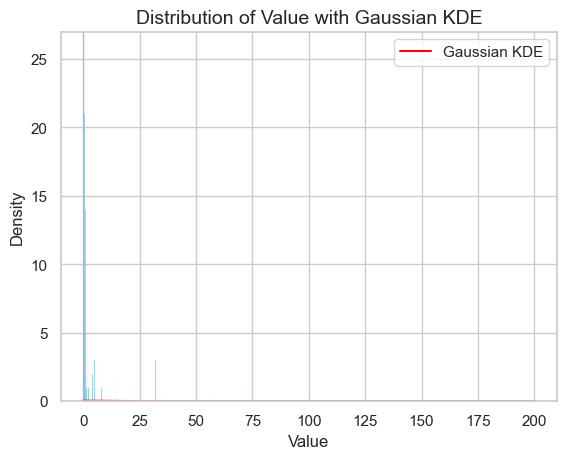

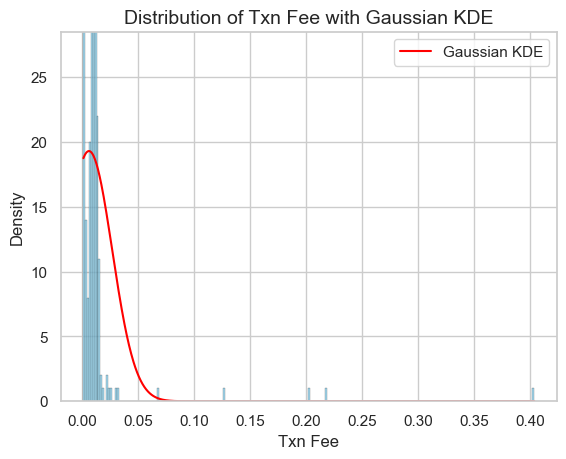

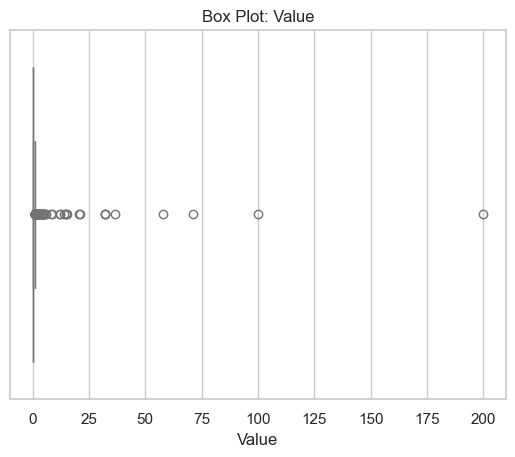

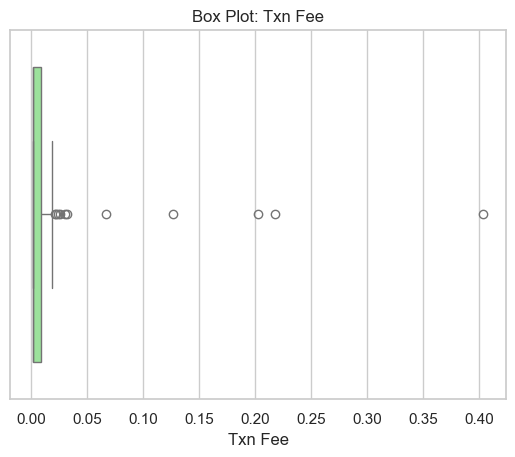

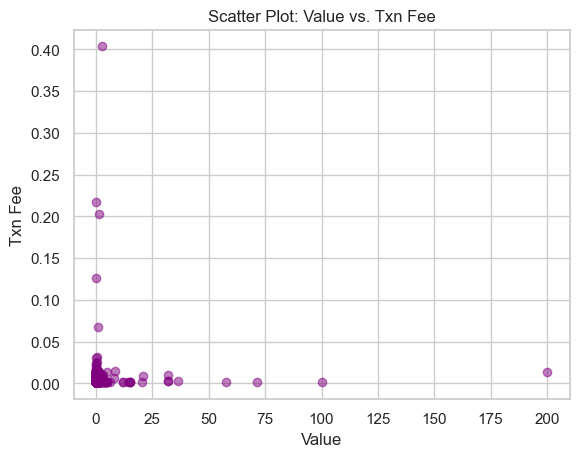

In [63]:
plot_histogram_and_kde(filtered_df , "Value" , "auto")
plot_histogram_and_kde(filtered_df , "Txn Fee" , "auto")
plot_box_plot(filtered_df , "Value")
plot_box_plot(filtered_df , "Txn Fee")
plot_scatter(filtered_df , "Value" , "Txn Fee")

In [40]:
filtered_df

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
0,0x8683e19059dded0e7fba5c01c7f7d267854c1d30a92f...,Transfer,19398343,7 secs ago,0x1AB4973a...7688f8F23,0xbf7769d6...6044a582B,0.007733,0.001542
3,0x483a6ba8f0e708d14e620992a68432ba785ebb2cb721...,Transfer,19398343,7 secs ago,Crypto.com 2,0x7bace6C6...E314e7A15,0.923900,0.001513
4,0xa74a3fa3afb96963233b26a98262312ffaea439eee71...,Transfer,19398343,7 secs ago,Crypto.com 2,0x4421cFF5...247c6E390,0.045370,0.001513
6,0x4abe4ba1d3ba231eac0889177fc8c76739f919da1e63...,Transfer,19398343,7 secs ago,Crypto.com 2,0x5e703FB2...1aF079779,0.012130,0.001513
8,0x1636d1d0bc6d5e16aa0dddc319f3f2717ddd14d3c7d4...,Transfer,19398343,7 secs ago,Binance 14,0xc33b2249...3AFbbeb4d,0.021975,0.001540
...,...,...,...,...,...,...,...,...
2495,0xf15d7b5531b4e9ed0043b22200a76924446ba6d0c415...,Transfer,19398340,2 mins ago,0x99695653...ebEe51738,Coinbase 13,0.006753,0.001244
2496,0x9e5579f6059ac590c7a2bb173120c146a94127ce9819...,Transfer,19398340,2 mins ago,0x2e9Db1A1...81F9A4171,0x1ec09AB5...b90E74b99,0.010000,0.001244
2497,0xe1b7659093494731dea46b0286ee6db48c2c69851859...,Transfer,19398340,2 mins ago,0x64e4e046...122EC8f0d,Coinbase 13,0.008691,0.001244
2498,0x20f003d3319c6de5765a091d974aa0ee5e6c5ea3ee3c...,Transfer,19398340,2 mins ago,Coinbase 11,0x47A46D4B...e710a71E2,0.012764,0.001244


## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [2]:
# Your code here

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [1]:
# Your code here

In [64]:
df.to_csv('my_dataframe1.csv', index=False)